In [24]:
import pandas as pd
import numpy as np

In [25]:
file = './mushrooms12.csv'
data = pd.read_csv(file)
data

,id,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-size,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,veil-color,habitat
0,0,p,x,s,n,p,f,n,k,e,w,w,w,u
1,1,e,x,s,y,a,f,b,k,e,w,w,w,g
2,2,e,b,s,w,l,f,b,n,e,w,w,w,m
3,3,p,x,y,w,p,f,n,n,e,w,w,w,u
4,4,e,x,s,g,n,f,b,k,t,w,w,w,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,e,k,s,n,n,a,b,y,e,o,o,o,l
8120,8120,e,x,s,n,n,a,b,y,e,o,o,n,l
8121,8121,e,f,s,n,n,a,b,n,e,o,o,o,l
8122,8122,p,k,y,n,y,f,n,b,t,w,w,w,l


In [26]:
print('>>Colonne') #Vediamo i tipi delle colonne
print(data.columns)
print('\n>>Tipi')
print(data.dtypes)

>>Colonne
Index(['id', 'class', 'cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-attachment', 'gill-size', 'gill-color', 'stalk-shape',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'habitat'],
      dtype='object')

>>Tipi
id                         int64
class                     object
cap-shape                 object
cap-surface               object
cap-color                 object
odor                      object
gill-attachment           object
gill-size                 object
gill-color                object
stalk-shape               object
stalk-color-above-ring    object
stalk-color-below-ring    object
veil-color                object
habitat                   object
dtype: object


In [27]:
maskE = data["class"] == 'e'  #"dividiamo" i due tipi di funghi
maskP = data["class"] == 'p'

print('>>Edible')
print(data[maskE].describe())
print('\n>>Poisonous')
print(data[maskP].describe())

>>Edible
                id
count  4208.000000
mean   2866.575808
std    2220.231033
min       1.000000
25%    1175.750000
50%    2360.500000
75%    3691.500000
max    8123.000000

>>Poisonous
                id
count  3916.000000
mean   5345.524770
std    1712.304622
min       0.000000
25%    4351.750000
50%    5499.500000
75%    6642.250000
max    8122.000000


In [28]:
classe = np.sort(data["class"].dropna().unique()) # feature classe resa numerica
print(classe)

for i, col in enumerate(classe):
    data['class'].replace(col, i, inplace=True)

['e' 'p']


In [30]:
for cl in data.columns: #rendiamo numeriche tutte le feature presenti
    i = np.sort(data[cl].dropna().unique())
    for j, k in enumerate(i):
        data[cl].replace(k, j, inplace=True)

data

,id,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-size,gill-color,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,veil-color,habitat
0,0,1,5.0,2.0,4.0,6.0,1.0,1.0,4.0,0.0,7.0,7.0,2.0,5.0
1,1,0,5.0,2.0,9.0,0.0,1.0,0.0,4.0,0.0,7.0,7.0,2.0,1.0
2,2,0,0.0,2.0,8.0,3.0,1.0,0.0,5.0,0.0,7.0,7.0,2.0,3.0
3,3,1,5.0,3.0,8.0,6.0,1.0,1.0,5.0,0.0,7.0,7.0,2.0,5.0
4,4,0,5.0,2.0,3.0,5.0,1.0,0.0,4.0,1.0,7.0,7.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,0,3.0,2.0,4.0,5.0,0.0,0.0,11.0,0.0,5.0,5.0,1.0,2.0
8120,8120,0,5.0,2.0,4.0,5.0,0.0,0.0,11.0,0.0,5.0,5.0,0.0,2.0
8121,8121,0,2.0,2.0,4.0,5.0,0.0,0.0,5.0,0.0,5.0,5.0,1.0,2.0
8122,8122,1,3.0,3.0,4.0,8.0,1.0,1.0,0.0,1.0,7.0,7.0,2.0,2.0


In [31]:
import seaborn as sns

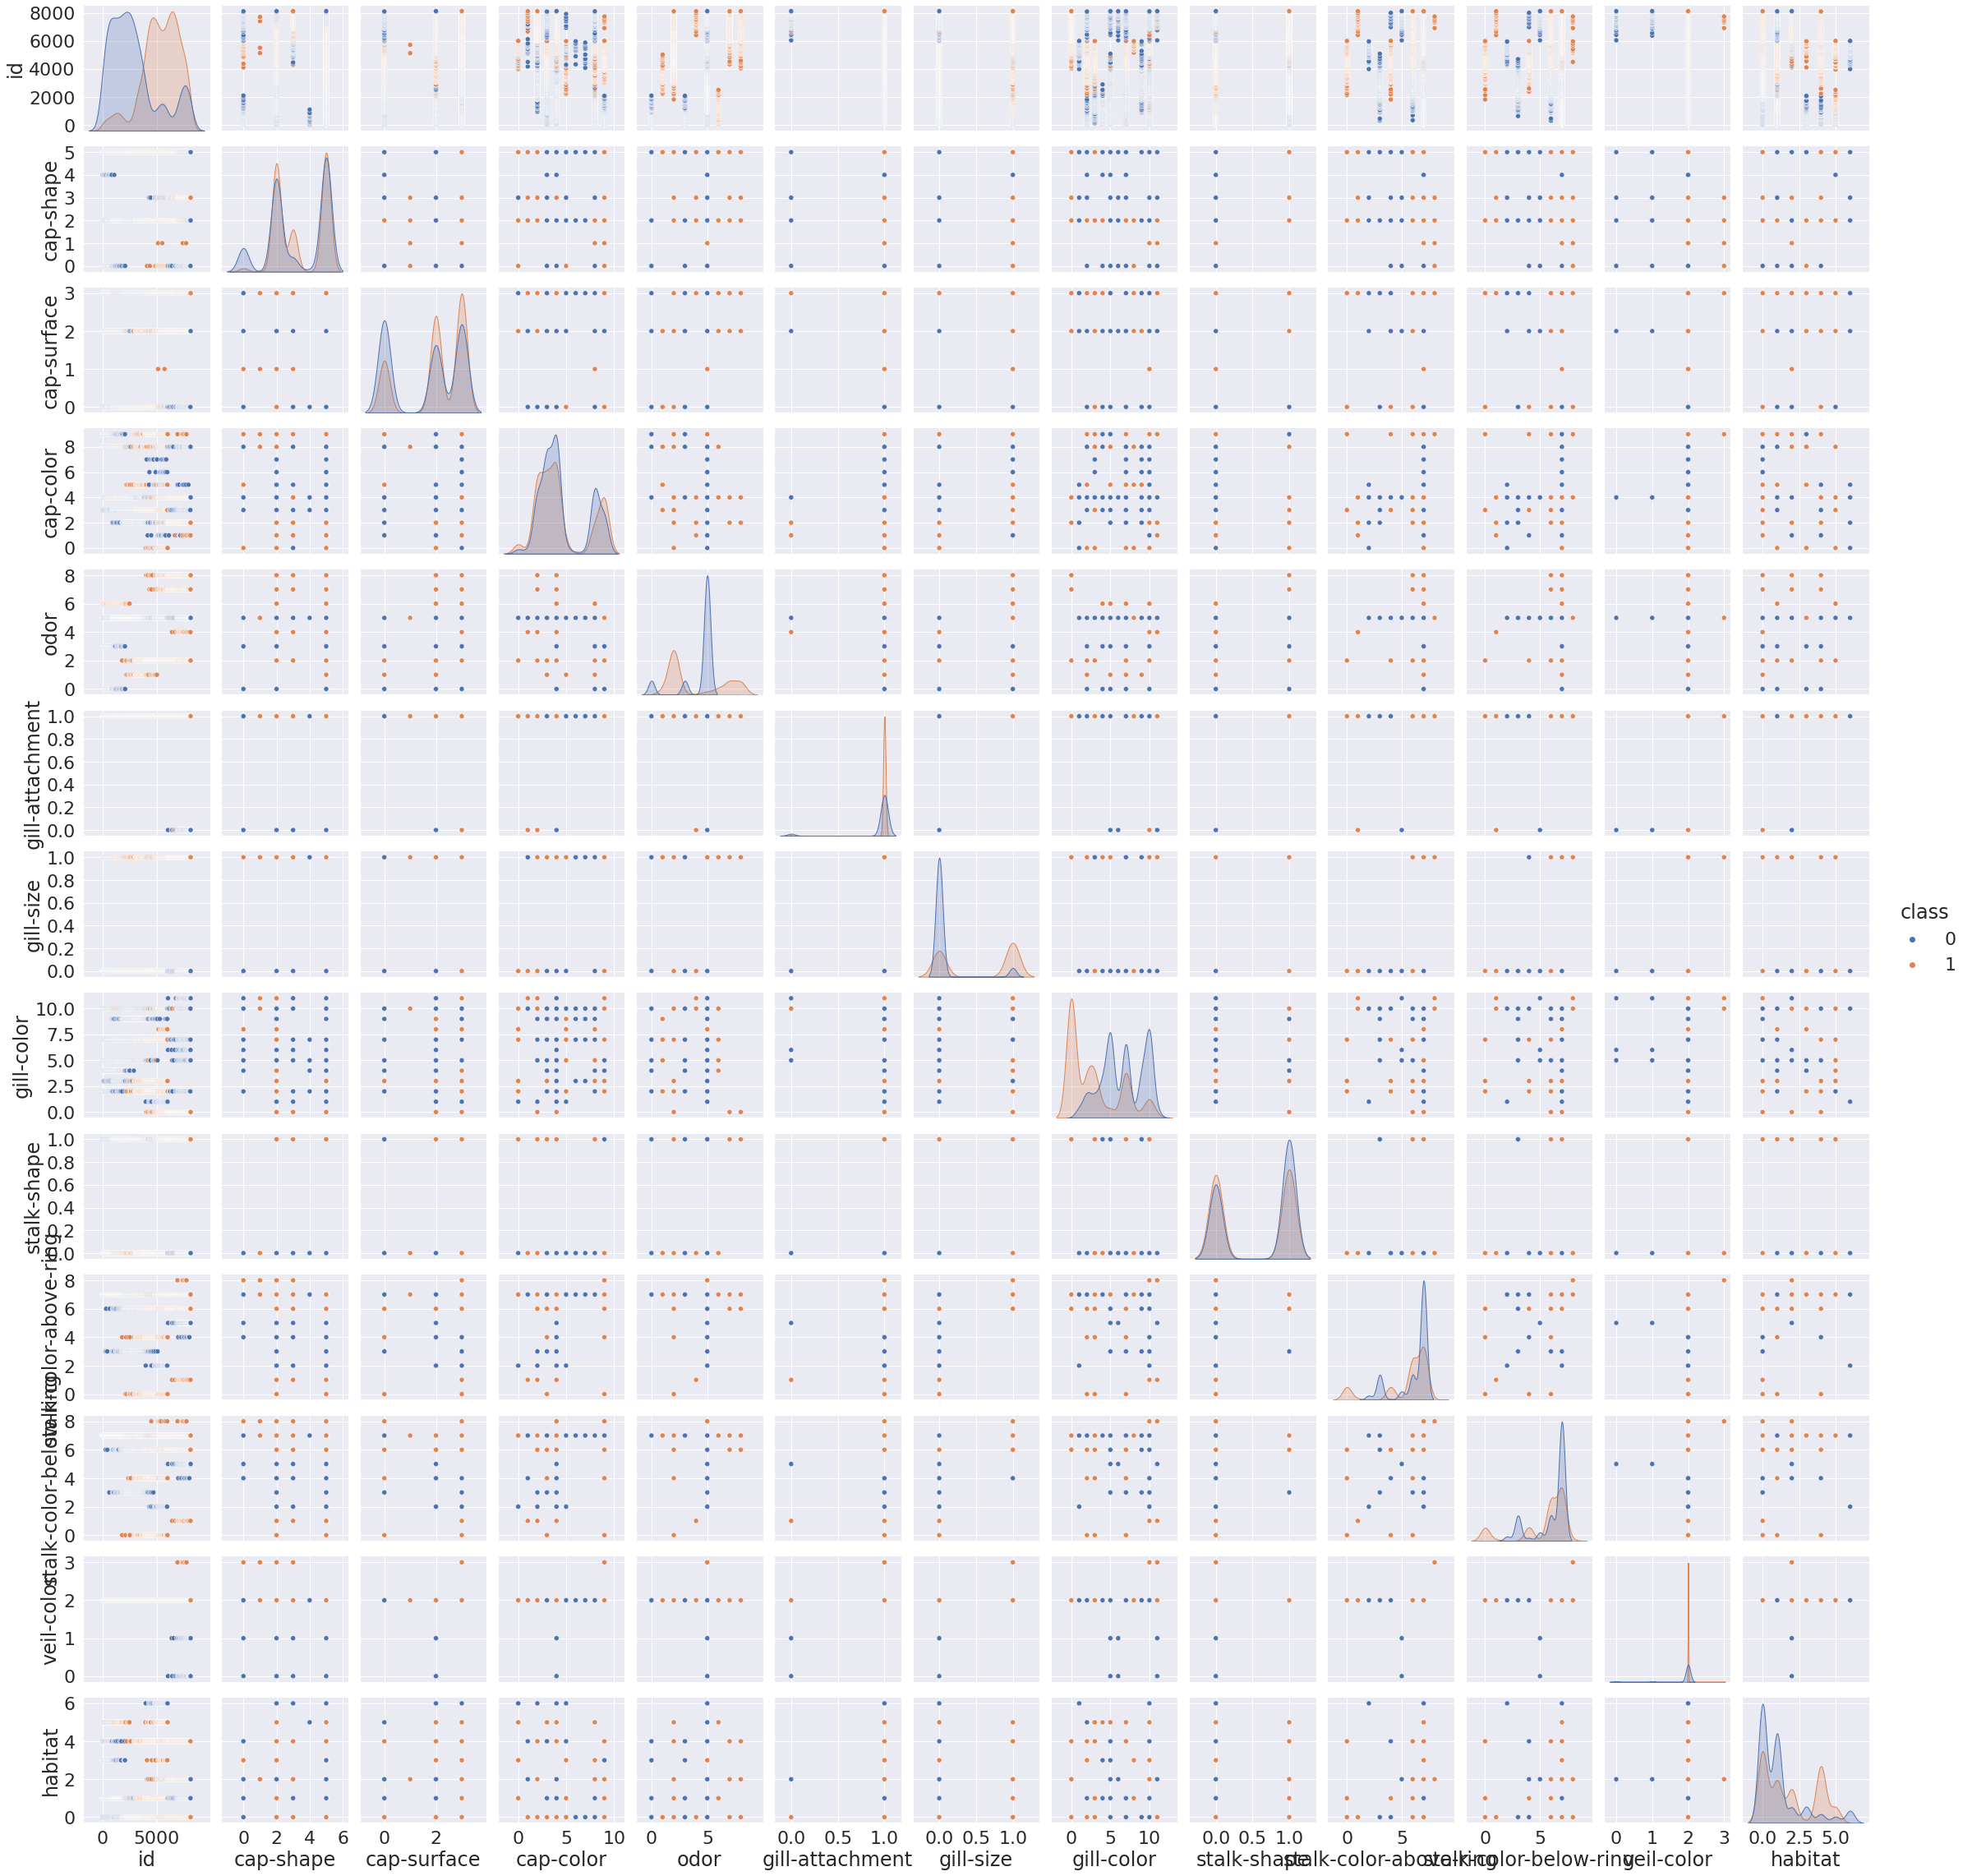

In [32]:
sns.set_theme(font_scale=2) #grafico di comparazione tra le fueature
sns.pairplot(data, hue='class', dropna=True)
sns.set()

## Pulizia dati

In [33]:
cols_with_missing = [col for col in data.columns if data[col].isnull().sum() > 0]
print(cols_with_missing)

['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']


In [35]:
selected_cols = ['odor', 'gill-size', 'gill-color'] #queste feature sono quelle che dal grafico sembravano avere un distacco più netto, rendendo quindi più facile la divisione dei due campioni
data = data.dropna(axis='index', subset=selected_cols)
print(data.shape)

(7929, 14)


In [36]:
print([col for col in data.columns if data[col].isnull().sum() > 0])

['cap-shape', 'cap-surface', 'cap-color', 'gill-attachment', 'stalk-shape', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'habitat']


In [37]:
X = data[selected_cols]
y = data['class']
print(X)
print(y)

      odor  gill-size  gill-color
0      6.0        1.0         4.0
1      0.0        0.0         4.0
2      3.0        0.0         5.0
3      6.0        1.0         5.0
4      5.0        0.0         4.0
...    ...        ...         ...
8119   5.0        0.0        11.0
8120   5.0        0.0        11.0
8121   5.0        0.0         5.0
8122   8.0        1.0         0.0
8123   5.0        0.0        11.0

[7929 rows x 3 columns]
0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 7929, dtype: int64


## Divisione dati

In [38]:
from sklearn.model_selection import train_test_split #dividiamo il dataset per avere dati per fare test e training

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0) #train_size = percentuale di valori che vanno nel train (70%), il resto va nel test

print(X_train.head())
print("Numero di campioni in X train: ", X_train.shape[0])
print(y_train.value_counts())
print(y_train.head())

      odor  gill-size  gill-color
7527   7.0        1.0         0.0
8098   8.0        1.0         0.0
2945   5.0        0.0         7.0
4394   2.0        0.0         3.0
2170   5.0        0.0         7.0
Numero di campioni in X train:  5550
0    2882
1    2668
Name: class, dtype: int64
7527    1
8098    1
2945    0
4394    1
2170    0
Name: class, dtype: int64


## Standardizzazione

In [39]:
pd.options.display.float_format = '{:.3f}'.format  #standardizziamo i dati per poter confrontare le feature

mean = X_train.mean()
print(f'>>Media: {mean}')
std = X_train.std()
print(f'>>Deviazione standard: {std}')

X_train_std = (X_train-mean)/std
print('\nX train normalizzato:\n',X_train_std.describe())

X_test_std = (X_test-mean)/std     # normalizziamo
print(f">>X test Normalizzato \n {X_test_std.describe()}")

>>Media: odor         4.133
gill-size    0.305
gill-color   4.839
dtype: float64
>>Deviazione standard: odor         2.081
gill-size    0.460
gill-color   3.524
dtype: float64

X train normalizzato:
           odor  gill-size  gill-color
count 5550.000   5550.000    5550.000
mean    -0.000      0.000       0.000
std      1.000      1.000       1.000
min     -1.986     -0.662      -1.373
25%     -1.025     -0.662      -0.806
50%      0.417     -0.662       0.046
75%      0.417      1.511       0.613
max      1.858      1.511       1.748
>>X test Normalizzato 
           odor  gill-size  gill-color
count 2379.000   2379.000    2379.000
mean     0.024      0.033      -0.031
std      1.037      1.013       1.017
min     -1.986     -0.662      -1.373
25%     -1.025     -0.662      -0.806
50%      0.417     -0.662       0.046
75%      0.417      1.511       0.613
max      1.858      1.511       1.748


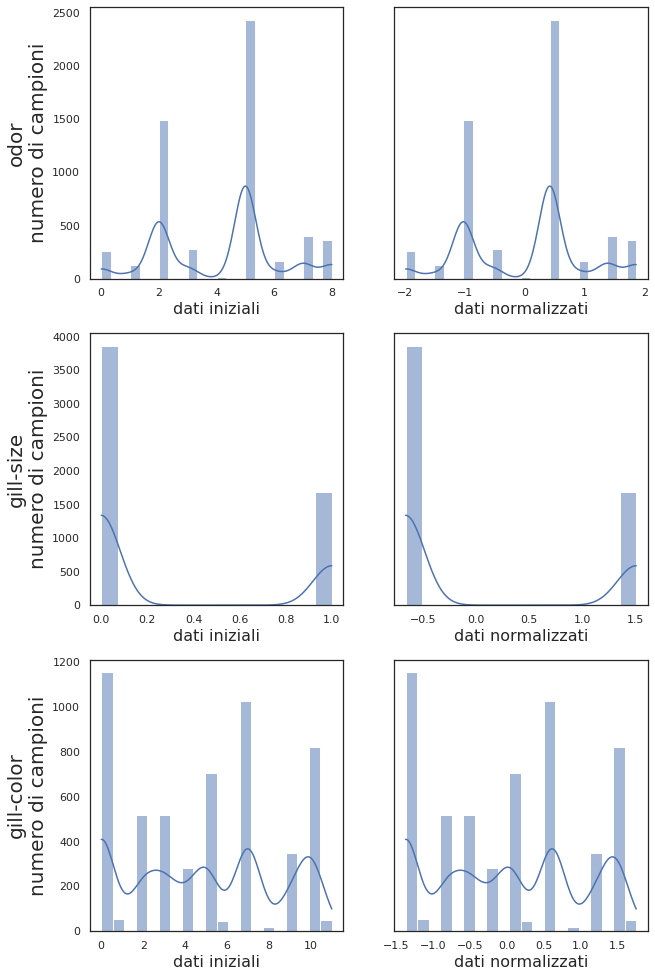

In [41]:
import seaborn as sns  
import matplotlib.pyplot as plt

sns.set_style("white") # imposta lo sfondo bianco senza griglia
fig, axes = plt.subplots(3, 2, figsize=(10,17), 
                      sharey='row') # condivide asse y per ogni righe

for i, ax in enumerate(axes):
    col = selected_cols[i] # feature corrente
    # etichette dell'asse x e dell'asse y
    ax[0].set_xlabel('dati iniziali', fontsize=16);
    ax[1].set_xlabel('dati normalizzati', fontsize=16)
    ax[0].set_ylabel(col+"\nnumero di campioni", fontsize=20); # asse y condiviso
    # grafici della colonna corrente
    sns.histplot(ax=ax[0], x=X_train[col], kde=True) 
    sns.histplot(ax=ax[1], x=X_train_std[col], kde=True)
sns.set()    # reimposta i valori di default

## Creazione e training del modello

In [110]:
from sklearn.neural_network import MLPClassifier #un multilayer perceptron secondo me può dare migliori risultati dato che con l'utilizzo di più liveli nascosti questo può fare una classificazione più precisa
                                                 # oltretutto le feature che ho scelto non sono linearmente separabili, quindi la scelta è obbligata
model = MLPClassifier(hidden_layer_sizes=(50,), 
                      random_state=1, max_iter=100)

model.fit(X_train_std, y_train)

/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=100, random_state=1)

In [115]:
#Predizioni sui dati di training
print("Train")
print(y_train.values[:5])
print(model.predict(X_train_std[:5]))

#Predizioni sui dati di test
print("Test")
print(y_test.values[:5])
print(model.predict(X_test_std[:5]))

Train
[1 1 0 1 0]
[1 1 0 1 0]
Test
[0 0 0 1 0]
[0 0 0 1 0]


In [112]:
print("Accuratezza dati di TRAIN: %.3f" % model.score(X_train_std, y_train))

# questo è un metodo alternativo per avere l'accuratezza
predictions = model.predict(X_test_std)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print("Accuratezza dati di TEST: %.3f" % score)

Accuratezza dati di TRAIN: 0.981
Accuratezza dati di TEST: 0.982


/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (7) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/site-p

/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (71) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (73) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (77) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rdfilippo/.local/lib/python3.10/si

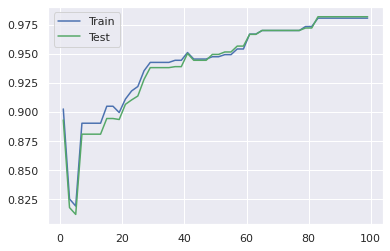

In [116]:
start = 1
stop = 100
passo = 2

vEpochs = np.arange(start, stop, passo)
vAccTrain = []  #lista dell'accuratezza sui dati di train
vAccTest = []   #lista dell'accuratezza sui dati di test

for e in vEpochs:
    mlp = MLPClassifier(hidden_layer_sizes=(50,), random_state=1,
                        max_iter=e)
    mlp.fit(X_train_std, y_train)   
    vAccTrain.append(mlp.score(X_train_std, y_train)) # accuratezza sul training set
    vAccTest.append(mlp.score(X_test_std, y_test))    # accuratezza sul test set

#grafico dell'accuratezza 
import matplotlib.pyplot as plt
plt.plot(vEpochs, vAccTrain, c='b', label = 'Train')
plt.plot(vEpochs, vAccTest, c='g', label = 'Test')
plt.legend()